Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 20.9     |
|    ep_rew_mean     | 20.9     |
| time/              |          |
|    fps             | 45       |
|    iterations      | 1        |
|    time_elapsed    | 45       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 24.9        |
|    ep_rew_mean          | 24.9        |
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 2           |
|    time_elapsed         | 90          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008827667 |
|    clip_fraction        | 0.116       |
|    clip_range           | 0.2         |
|    entropy_loss   

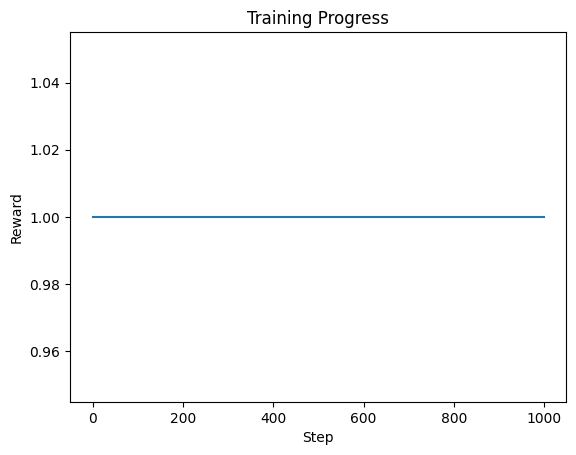

In [8]:
# Benötigte Bibliotheken importieren
import gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy

# Initialisiere die Umgebung mit Render-Modus
env = gym.make('CartPole-v1', render_mode='human')

# Initialisiere den RL-Agenten
model = PPO('MlpPolicy', env, verbose=1)

# Training des Agenten
model.learn(total_timesteps=10000)

# Bewertung des trainierten Agenten
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
print(f"Durchschnittliche Belohnung: {mean_reward} +/- {std_reward}")

# Debugging-Informationen
obs = env.reset()
print(f"Initiale Beobachtung: {obs}")

# Überprüfen, ob die Beobachtung ein Numpy-Array ist
print(f"Typ der Beobachtung: {type(obs)}")

# Sammeln der Trainingsdaten
rewards = []

max_steps = 1000  # Maximal 1000 Schritte
for i in range(max_steps):
    # Sicherstellen, dass die Beobachtung ein Numpy-Array ist
    if isinstance(obs, tuple):
        obs = obs[0]

    action, _states = model.predict(obs, deterministic=True)

    # Sicherstellen, dass nur die ersten vier Werte entpackt werden
    step_result = env.step(action)
    if len(step_result) == 4:
        obs, reward, done, info = step_result
    else:
        obs, reward, done, info, *_ = step_result  # Zusätzliche Werte ignorieren

    rewards.append(reward)

    env.render()
    print(f"Schritt {i+1}/{max_steps}, Belohnung: {reward}, abgeschlossen: {done}")
    
    if done:
        print(f"Episode nach {i+1} Schritten beendet.")
        obs = env.reset()
        continue

env.close()

# Ergebnisse visualisieren
def plot_results(rewards):
    plt.plot(rewards)
    plt.xlabel('Schritt')
    plt.ylabel('Belohnung')
    plt.title('Trainingsfortschritt')
    plt.show()

plot_results(rewards)
